# Canoe



In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

def convstr(fr):
    if(fr<10):
        return '000'+str(fr)
    if(fr<100):
        return '00'+str(fr) 
    if(fr<1000):
        return '0'+str(fr)
    return str(fr)

kernel2 = np.ones((2,2), np.uint8)
kernel3 = np.ones((3,3), np.uint8)
def fun(thresh,im_gr,i1,i2,i3,i4):
    im_bw = cv2.threshold(im_gr, thresh, 255, cv2.THRESH_BINARY)[1]
    im_bw_blur = cv2.blur(im_bw,(2,2))
    img_dilation = cv2.dilate(im_bw_blur, kernel2, iterations=i1) 
    img_erosion = cv2.erode(img_dilation, kernel2, iterations=i2) 
    img_dil = cv2.dilate(img_erosion, kernel3, iterations=i3) 
    img_er = cv2.erode(img_dil, kernel3, iterations=i4) 
    im_er_bin = cv2.threshold(img_er, thresh, 255, cv2.THRESH_BINARY)[1]
    return im_er_bin

In [2]:
fr= 1
strfr = convstr(fr)
# path=r'C:\Users\Student\DIP\canoe\input\in00'+ strfr+'.jpg'
path = r'C:\Users\GiridharaSPK\Desktop\canoe\input\in00'+ strfr+'.jpg'
img = io.imread(path)
img = img.astype(int)
total=np.zeros(img.shape,np.float)

In [3]:
while(fr<=1189):
    strfr = convstr(fr)
    img = io.imread('canoe\input\in00'+ strfr+'.jpg')
    total=total+img
    avgt=total/(fr)
    avgt=np.array(np.round(avgt),dtype=np.int)
    x=abs(avgt-img)
    x = x.astype(np.uint8)
#     x=img
    x=cv2.cvtColor(x,cv2.COLOR_BGR2GRAY)
#     cv2.imwrite('cde\in'+str(fr)+'.jpg',fun(60,x,1,2,3,2))
    cv2.imwrite('canoe\in\in'+str(fr)+'.jpg',fun(60,x,1,2,3,2))
    fr=fr+1

C:\Users\GiridharaSPK\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


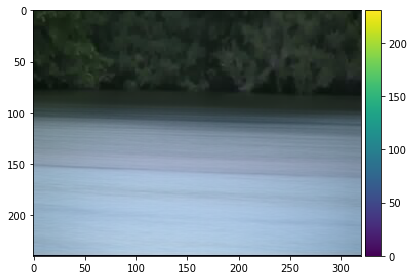

In [4]:
io.imshow(avgt)

In [5]:
while(fr<=1189):
    strfr = convstr(fr)
    img = cv2.imread(r'C:\Users\GiridharaSPK\Desktop\canoe\input\in00'+ strfr+'.jpg')
#     img = cv2.imread(r'C:\Users\Student\DIP\canoe\input\in00'+ strfr+'.jpg')
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (10,50,350,150)
    cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    cv2.imwrite('canoe\in\in'+str(fr)+'.jpg',img)
    fr=fr+1

In [6]:
l=[]
cnt=870
while cnt<=1070:
#     path = r'C:\Users\Student\DIP\can_in\in'+str(cnt)+'.png'
    path = 'canoe\in\in'+ str(cnt)+'.jpg'
    img2 = io.imread(path)
    path = 'canoe\groundtruth\gt00'+ convstr(cnt)+'.png'
#     path=r'C:\Users\Student\DIP\canoe\groundtruth\gt00'+convstr(cnt)+'.png'
    tmg2 = io.imread(path)
    tn, fp, fn, tp = confusion_matrix(tmg2.flatten(),img2.flatten(),labels=[0,255]).ravel()
    l.append([tn, fp, fn, tp])
    cnt=cnt+1

In [7]:
l

[[63104, 3077, 217, 1865],
 [63338, 2880, 271, 2043],
 [63194, 2864, 306, 2148],
 [63377, 2973, 317, 2109],
 [63460, 2707, 291, 2260],
 [63743, 2434, 286, 2292],
 [62830, 2863, 313, 2268],
 [63249, 2669, 307, 2272],
 [62034, 3229, 314, 2328],
 [62309, 3132, 334, 2315],
 [62216, 3108, 269, 2428],
 [62389, 2942, 256, 2518],
 [62379, 2871, 303, 2542],
 [62392, 2798, 260, 2590],
 [62474, 2843, 258, 2589],
 [62686, 2821, 264, 2591],
 [63069, 2682, 272, 2620],
 [62554, 2675, 305, 2592],
 [62567, 2757, 332, 2654],
 [63048, 2585, 284, 2795],
 [62492, 2824, 362, 2820],
 [61859, 2714, 394, 2969],
 [62448, 2442, 375, 3118],
 [61371, 2516, 385, 3177],
 [61684, 2534, 395, 3213],
 [61351, 2840, 369, 3279],
 [60429, 2844, 413, 3467],
 [61220, 2703, 392, 3470],
 [60816, 2804, 385, 3629],
 [61078, 2867, 398, 3684],
 [61191, 2602, 433, 3730],
 [61348, 2635, 381, 3732],
 [61129, 2443, 408, 3772],
 [61513, 2349, 328, 3787],
 [61632, 2290, 289, 3957],
 [61025, 2456, 259, 4018],
 [61888, 2080, 319, 4194],
 

In [8]:
fp=0 
fn=0 
tp=0
p=0
r=0
for i in range(len(l)):
    tp=tp+l[i][3]
    fp=fp+l[i][1]
    fn=fn+l[i][2]
    p=p+l[i][3]/(l[i][3]+l[i][1])
    r=r+l[i][3]/(l[i][3]+l[i][2])
p=p/i
r=r/i
print('Micro Prescion: ',tp/(tp+fp))
print('Micro Recall: ',tp/(tp+fn))
print('Micro F-Score: ',2*(tp)/(2*tp+fp+fn))
print('Macro Prescion: ',p)
print('Macro Recall: ',r)
print('Macro F-Score: ',(2*p*r)/(p+r))

Micro Prescion:  0.602994470311059
Micro Recall:  0.9016805502825112
Micro F-Score:  0.7226921140658038
Macro Prescion:  0.5805338188914237
Macro Recall:  0.904382963996676
Macro F-Score:  0.7071438640597546


#### Micro

In [9]:
precision_recall_fscore_support(tmg2.flatten(), img2.flatten(), average='micro')#last image

(0.8387239583333334, 0.8387239583333334, 0.8387239583333334, None)

In [15]:
cnt = 950
path = 'canoe\in\in'+ str(cnt)+'.jpg'
img2 = io.imread(path)
path = 'canoe\groundtruth\gt00'+ convstr(cnt)+'.png'
tmg2 = io.imread(path)
precision_recall_fscore_support(tmg2.flatten(), img2.flatten(), average='micro')

(0.8482291666666667, 0.8482291666666667, 0.8482291666666667, None)

##### Relevancy of Black

In [12]:
l=[]
cnt=870
while cnt<=1070:
#     path = r'C:\Users\Student\DIP\can_in\in'+str(cnt)+'.png'
    path = 'canoe\in\in'+ str(cnt)+'.jpg'
    img2 = io.imread(path)
    path = 'canoe\groundtruth\gt00'+ convstr(cnt)+'.png'
#     path=r'C:\Users\Student\DIP\canoe\groundtruth\gt00'+convstr(cnt)+'.png'
    tmg2 = io.imread(path)
    tn, fp, fn, tp = confusion_matrix(tmg2.flatten(),img2.flatten(),labels=[255,0]).ravel()
    l.append([tn, fp, fn, tp])
    cnt=cnt+1

In [13]:
fp=0 
fn=0 
tp=0
p=0
r=0
for i in range(len(l)):
    tp=tp+l[i][3]
    fp=fp+l[i][1]
    fn=fn+l[i][2]
    p=p+l[i][3]/(l[i][3]+l[i][1])
    r=r+l[i][3]/(l[i][3]+l[i][2])
p=p/i
r=r/i
print('Micro Prescion: ',tp/(tp+fp))
print('Micro Recall: ',tp/(tp+fn))
print('Micro F-Score: ',2*(tp)/(2*tp+fp+fn))
print('Macro Prescion: ',p)
print('Macro Recall: ',r)
print('Macro F-Score: ',(2*p*r)/(p+r))

Micro Prescion:  0.9928176977200969
Micro Recall:  0.9581473500711184
Micro F-Score:  0.9751744627626155
Macro Prescion:  0.997711092933218
Macro Recall:  0.9630667011647717
Macro F-Score:  0.9800828363916837


In [14]:
l

[[1865, 217, 3077, 63104],
 [2043, 271, 2880, 63338],
 [2148, 306, 2864, 63194],
 [2109, 317, 2973, 63377],
 [2260, 291, 2707, 63460],
 [2292, 286, 2434, 63743],
 [2268, 313, 2863, 62830],
 [2272, 307, 2669, 63249],
 [2328, 314, 3229, 62034],
 [2315, 334, 3132, 62309],
 [2428, 269, 3108, 62216],
 [2518, 256, 2942, 62389],
 [2542, 303, 2871, 62379],
 [2590, 260, 2798, 62392],
 [2589, 258, 2843, 62474],
 [2591, 264, 2821, 62686],
 [2620, 272, 2682, 63069],
 [2592, 305, 2675, 62554],
 [2654, 332, 2757, 62567],
 [2795, 284, 2585, 63048],
 [2820, 362, 2824, 62492],
 [2969, 394, 2714, 61859],
 [3118, 375, 2442, 62448],
 [3177, 385, 2516, 61371],
 [3213, 395, 2534, 61684],
 [3279, 369, 2840, 61351],
 [3467, 413, 2844, 60429],
 [3470, 392, 2703, 61220],
 [3629, 385, 2804, 60816],
 [3684, 398, 2867, 61078],
 [3730, 433, 2602, 61191],
 [3732, 381, 2635, 61348],
 [3772, 408, 2443, 61129],
 [3787, 328, 2349, 61513],
 [3957, 289, 2290, 61632],
 [4018, 259, 2456, 61025],
 [4194, 319, 2080, 61888],
 

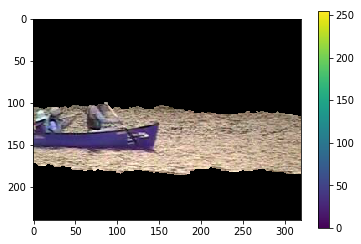

(<matplotlib.image.AxesImage at 0x17505375ba8>,
 None)

In [11]:
img = cv2.imread('canoe\input\in000901.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,50,360,150)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()